#데이터 로드 & 전처리

In [1]:
!pip install seaborn scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# CSV 파일 경로 지정
file_path = '/content/drive/MyDrive/ITStudy/09_MLDL/team_pj/bank.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터 확인
print(df)

## 총 11162개의 관측치와 17개의 변수가 있음
## job, education, contact, poutcome 변수에 결측값(여기서는 "unknown"으로 표시된 값)이 있다는 점을 알 수 있음

       age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.info()
## 10개의 범주형 특성과 7개의 수치형 특성이 있다는 것을 확인 가능
## 또한, 어떤 열에도 null 값은 없지만 앞서 언급한 대로 일부 열에는 결측값이 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# EDA
> 참고: https://www.kaggle.com/code/dunnguynduy/bank-marketing-eda

In [7]:
df.nunique()

,0
age,76
job,12
marital,3
education,4
default,2
balance,3805
housing,2
loan,2
contact,3
day,31


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


### target 클래스 분포 확인


In [10]:
df['deposit'].value_counts()

,count
deposit,
no,5873
yes,5289


#### 결측값 확인


In [11]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


<Axes: >

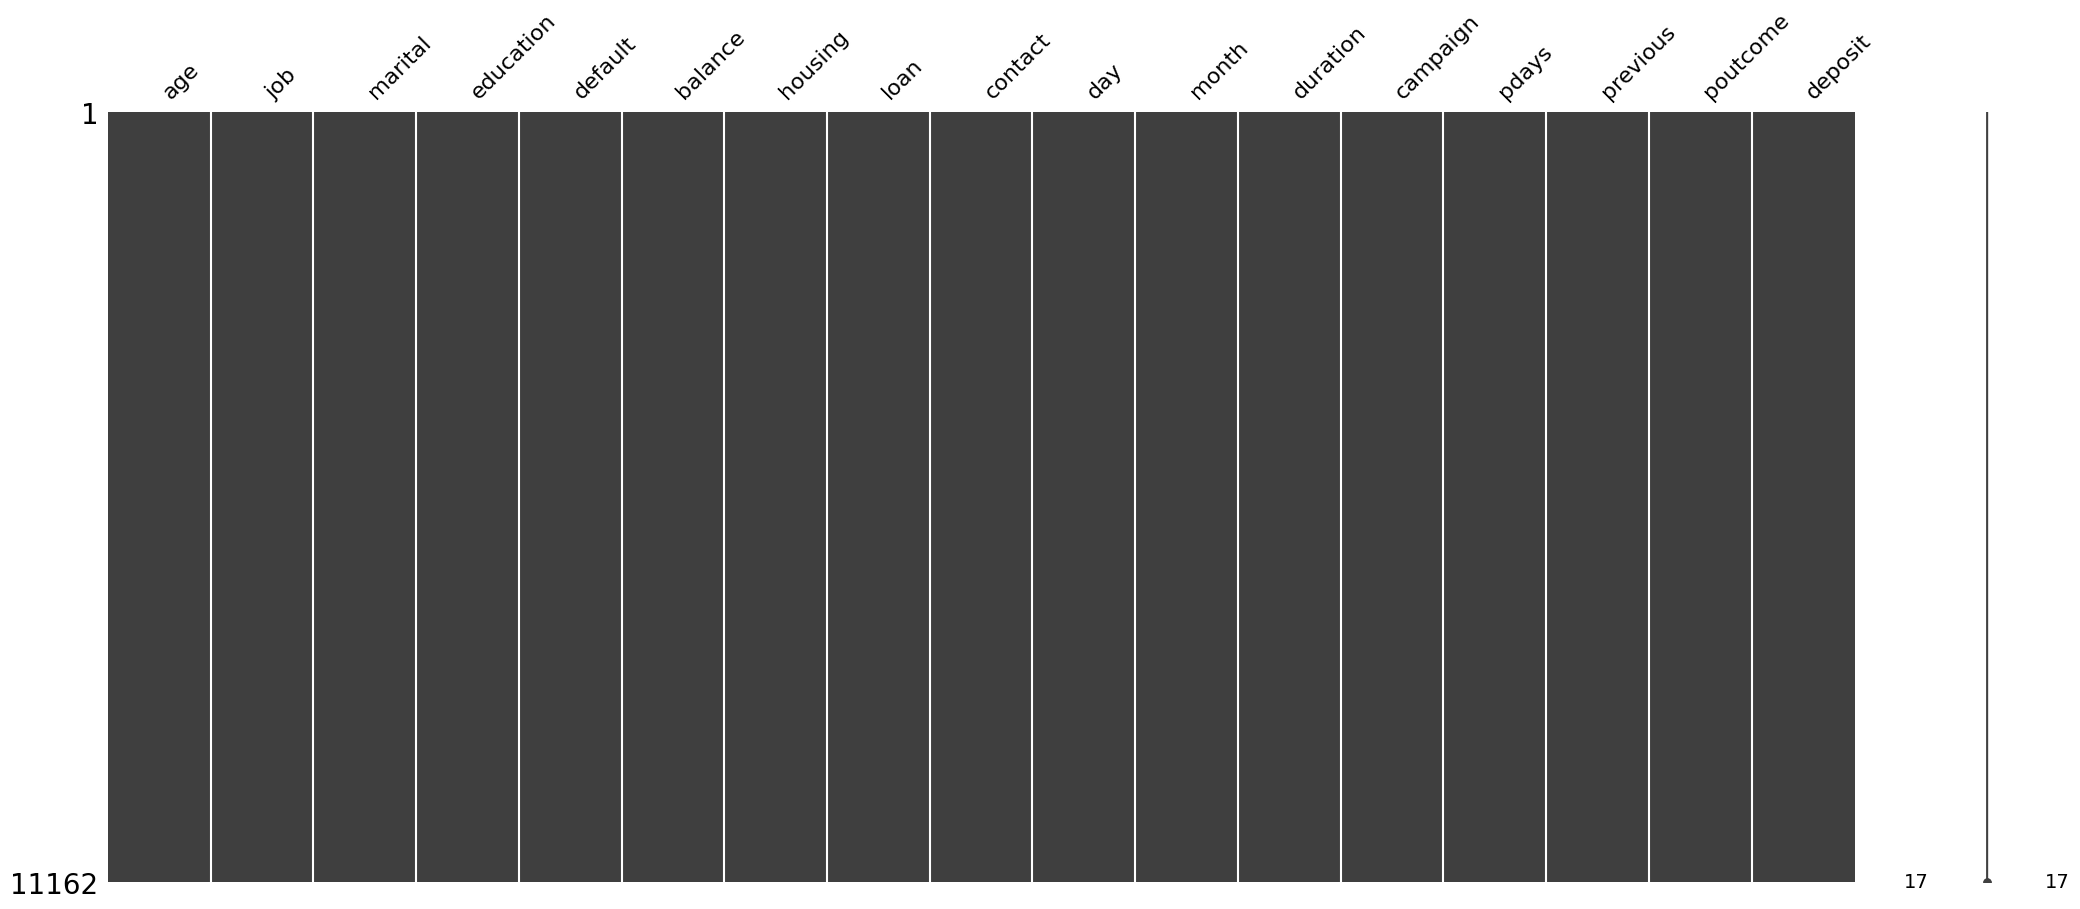

In [12]:
!pip install missingno
import missingno as msno

msno.matrix(df)

### EDA 시각화

In [13]:
def dist_box(data):
    Name = data.name.upper()
    fig, (ax_box, ax_dis) = plt.subplots(2, 1, gridspec_kw={"height_ratios": (.25, .75)}, figsize=(8, 5))

    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]

    fig.suptitle("SPREAD OF DATA FOR " + Name, fontsize=18, fontweight='bold')

    sns.boxplot(x=data, showmeans=True, orient='h', color="violet", ax=ax_box)
    ax_box.set(xlabel='')

    sns.histplot(data, kde=False, color='blue', ax=ax_dis)

    ax_dis.axvline(mean, color='r', linestyle='--', linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-', linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-', linewidth=2)

    plt.legend({'Mean': mean, 'Median': median, 'Mode': mode})
    plt.show()

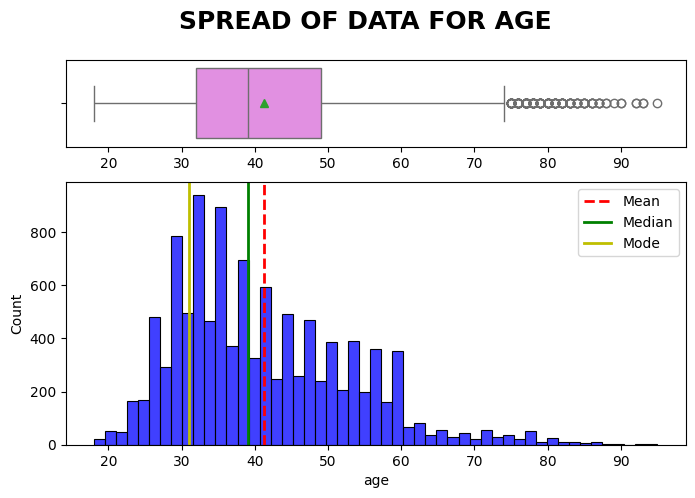

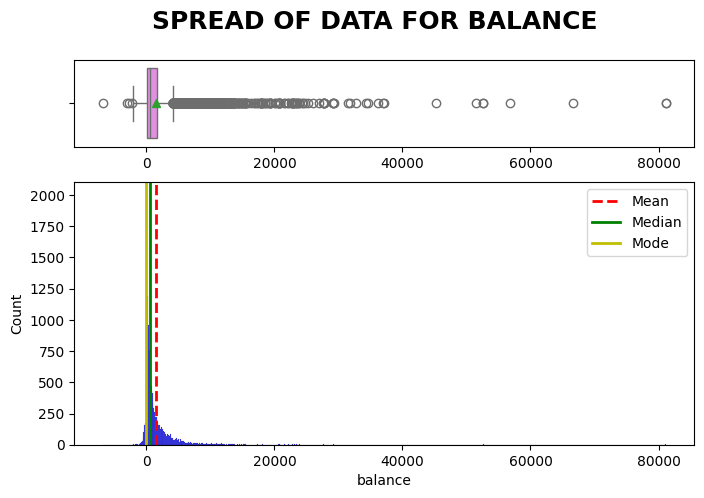

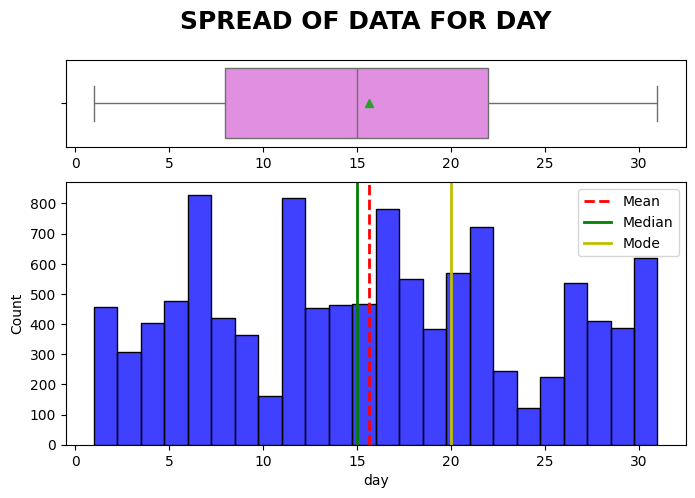

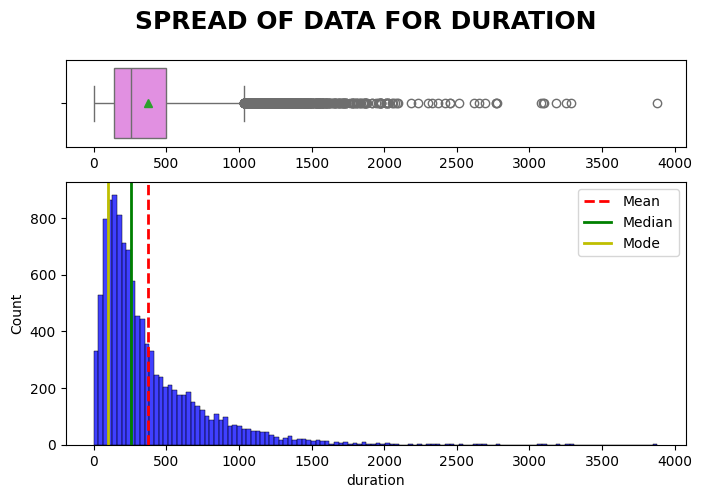

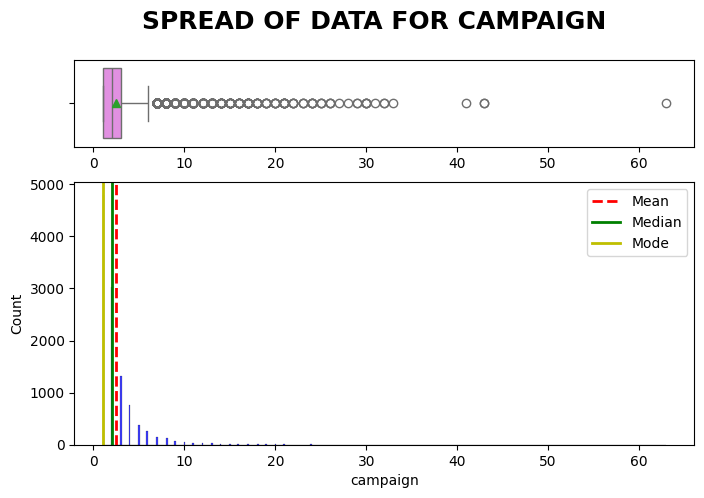

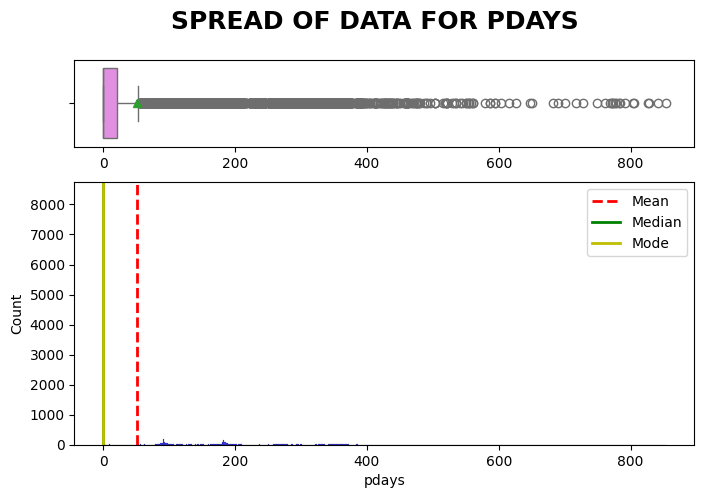

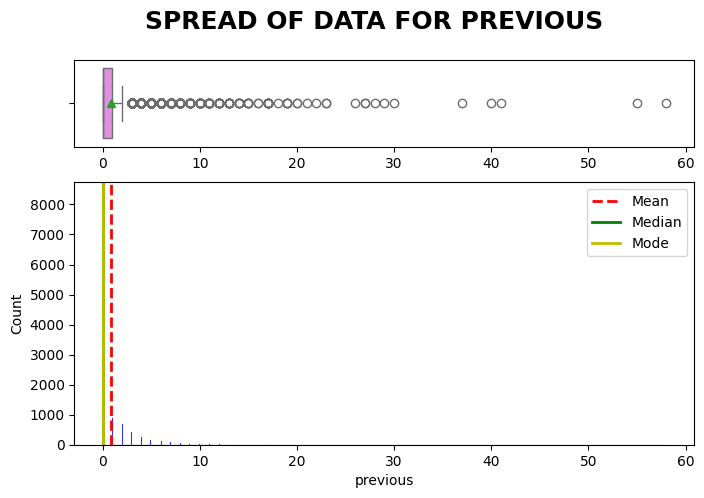

In [14]:
# 각 열에 대해 dist_box 함수 적용
list_col = df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

### EDA - columns 별 시각화 (추후 진행)

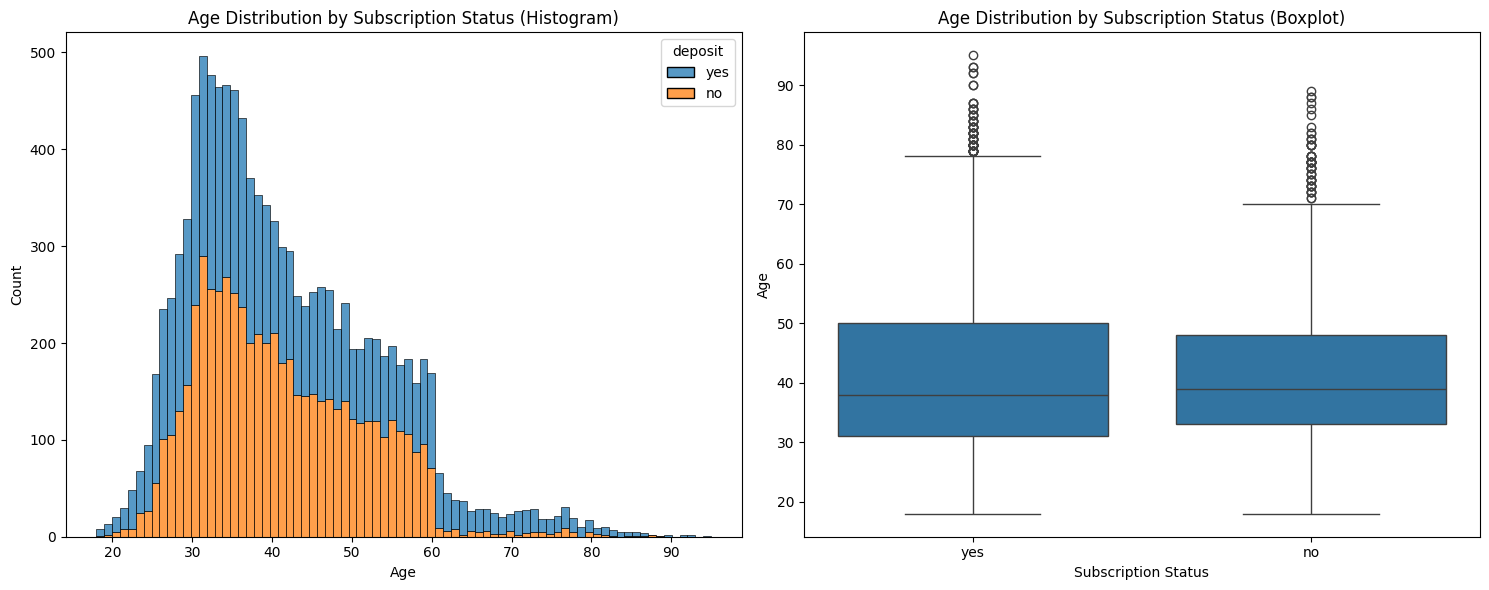

In [15]:
# AGE 칼럼
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='age', bins=95-18+1, hue='deposit', multiple='stack')  # 'deposit'으로 변경
plt.title('Age Distribution by Subscription Status (Histogram)')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='deposit', y='age')  # 'deposit'으로 변경
plt.title('Age Distribution by Subscription Status (Boxplot)')
plt.xlabel('Subscription Status')
plt.ylabel('Age')

plt.tight_layout()
plt.show()
## df.describe() - 고객 연령의 최소값은 18세, 최대값은 95세
## 따라서 각 연령대의 수를 세기 위해서는 bins 인자를 95-18+1로 설정해야 합니다.
## 대부분의 고객은 30~50세 사이에 위치
## 박스플롯에 따르면 70세 이상의 연령은 이상치로 간주됨
## 마지막 히스토그램은 이상치를 제외한 연령에 대한 히스토그램입니다.

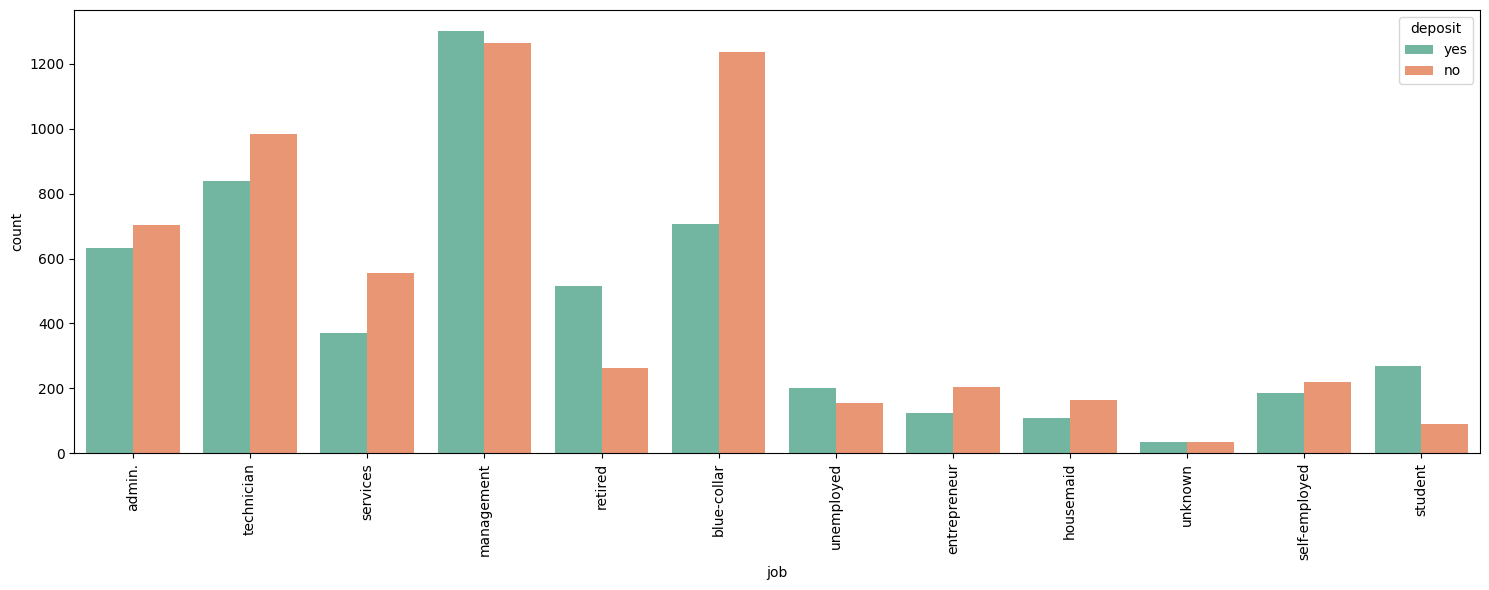

In [16]:
# JOB 칼럼
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="job", hue="deposit", palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## management 직업군이 가장 많은 수를 차지
## 직업에 대한 "unknown" 카테고리는 결측값으로 간주될 수 있으며, 가장 적은 수를 가지고 있음
## "unknown" 다음으로 "student" 직업 카테고리가 두 번째로 적은 수를 차지

# 직업별 고객 수:
# job
# management     2566
# blue-collar    1944
# technician     1823
# Name: count, dtype: int64

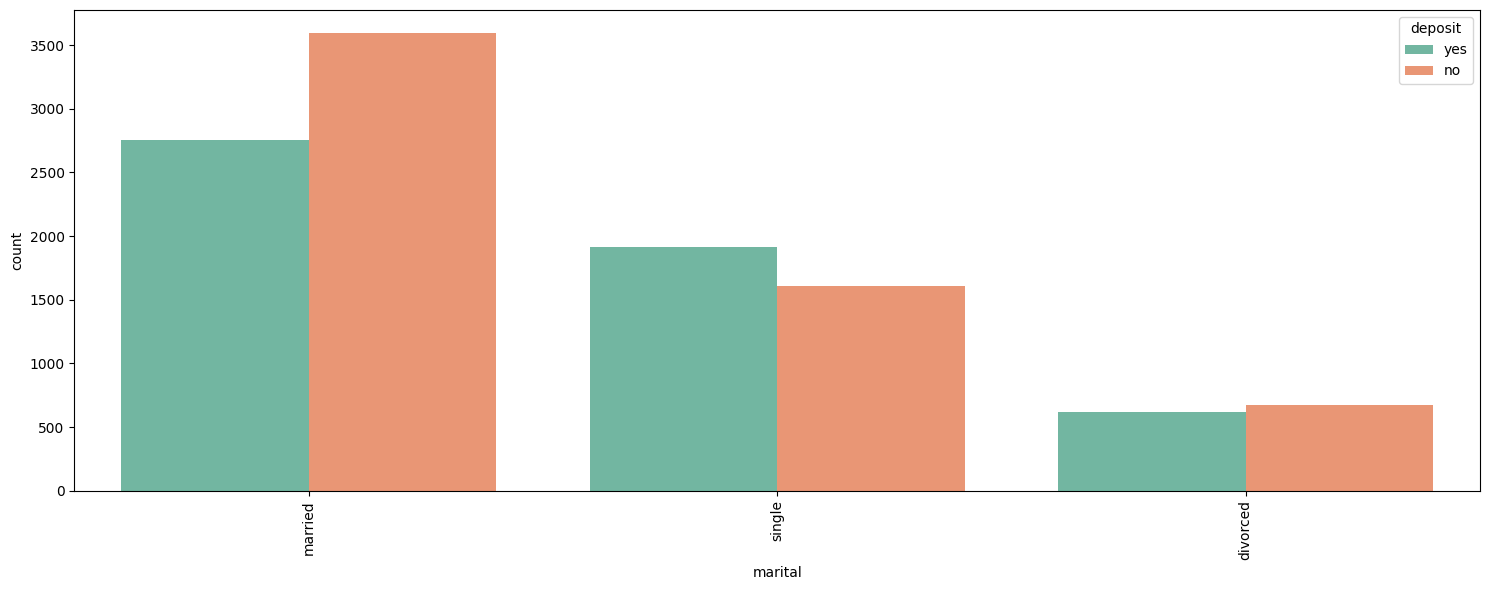

In [17]:
# Marital 칼럼

plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="marital", hue="deposit", palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 기혼자가 가장 많은 수를 차지하며, 그다음으로 미혼자와 이혼자가 차례대로 뒤따름

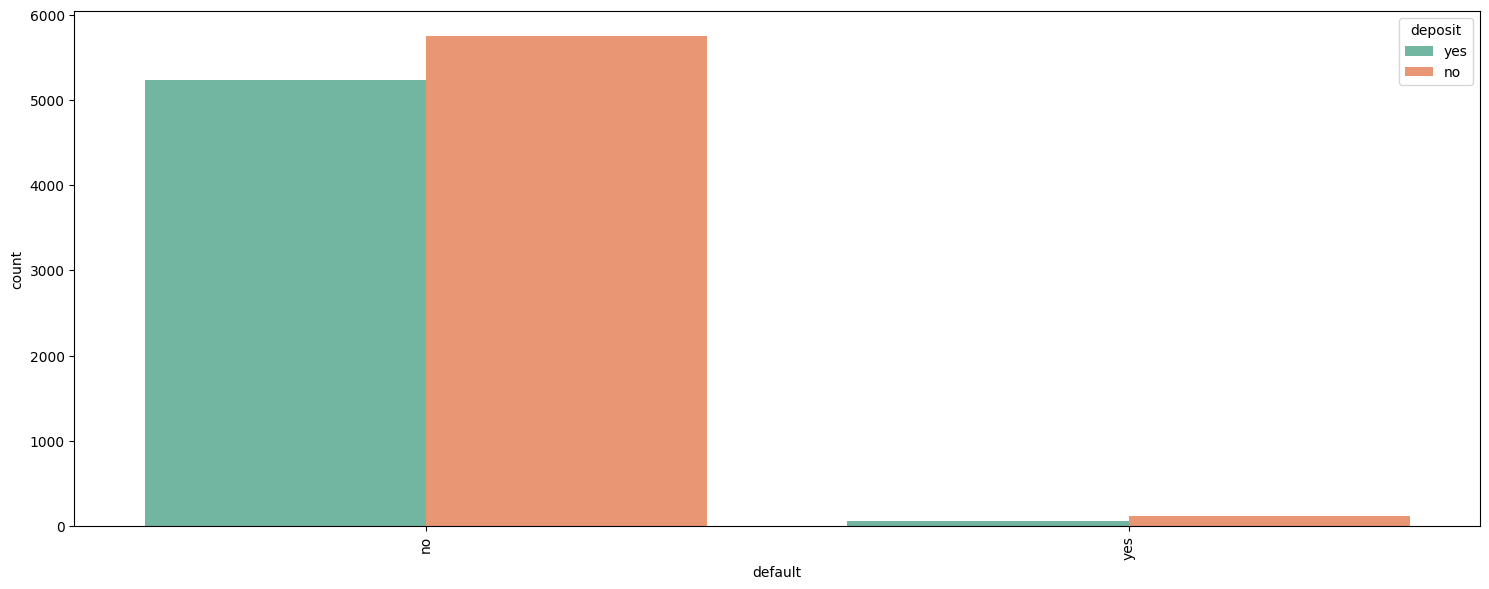

In [18]:
# Default 칼럼
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="default", hue="deposit", palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 고객이 신용 불이행(default)이 있는지 여부를 나타냄. 대부분의 고객이 신용 불이행이 없음

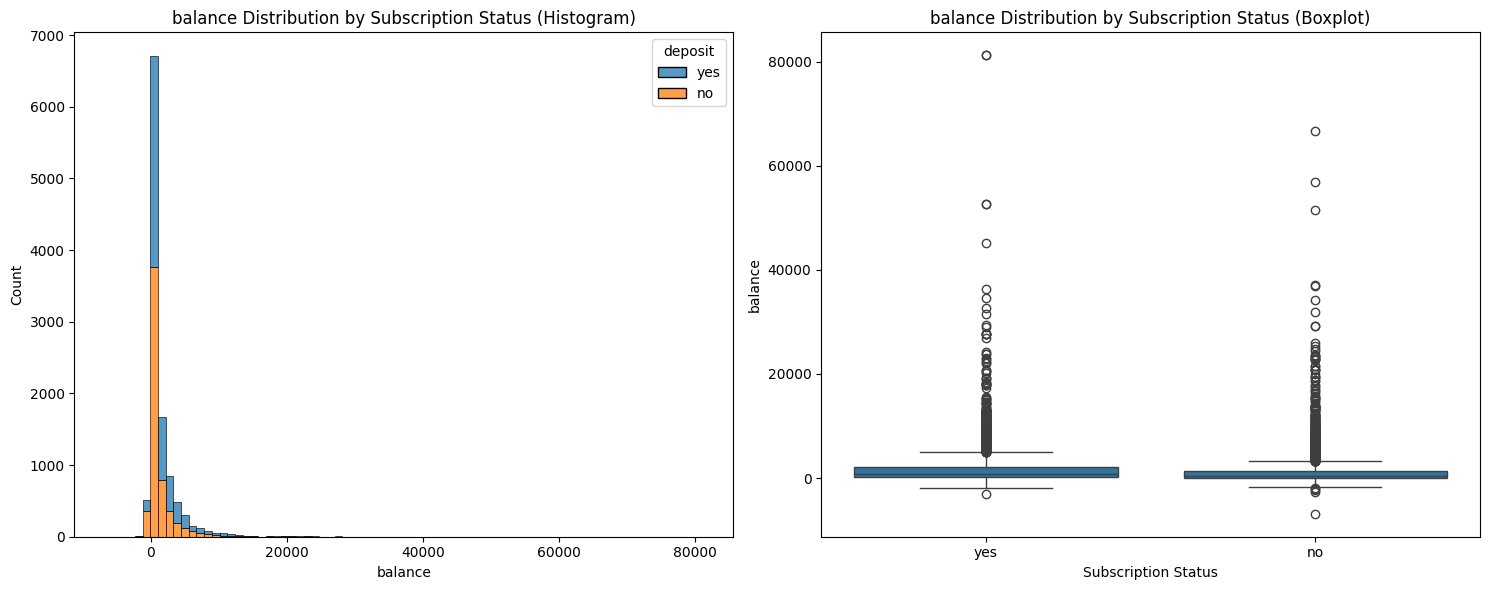

In [19]:
# balance 칼럼

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='balance', bins=95-18+1, hue='deposit', multiple='stack')
plt.title('balance Distribution by Subscription Status (Histogram)')
plt.xlabel('balance')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='deposit', y='balance')
plt.title('balance Distribution by Subscription Status (Boxplot)')
plt.xlabel('Subscription Status')
plt.ylabel('balance')

plt.tight_layout()
plt.show()

## 이 칼럼은 각 고객의 연간 평균 잔액을 나타냄
## 이 칼럼의 최소값은 -6847, 최대값은 81204, 평균은 약 1529, 표준편차는 3225
## 이러한 통계적 지표들은 이 칼럼이 다양한 값을 가지고 있으며 많은 이상치(outliers)가 존재한다는 것을 보여줍니다.
## 아래 히스토그램과 박스플롯을 통해 값의 빈도를 확인하고 이상치를 찾을 수 있습니다. 마지막 그래프는 박스플롯에서 확인된 이상치를 제외한 잔액 칼럼의 히스토그램입니다.

In [20]:
balance_data = df["balance"]

Q1 = np.percentile(balance_data, 25)
Q3 = np.percentile(balance_data, 75)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
# 이상치 경계 _ ex. -2257 이하, 4087이상의 값들은 모두 이상치로 처리 가능
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

Lower whisker: -2257.0
Upper whisker: 4087.0


In [21]:
# balance 칼럼의 통계적 정보 계산
balance_data = df['balance']

# 최소값, 최대값, 평균, 표준편차 계산
min_value = balance_data.min()
max_value = balance_data.max()
mean_value = balance_data.mean()
std_value = balance_data.std()

print(f"Min value: {min_value}")
print(f"Max value: {max_value}")
print(f"Mean value: {mean_value}")
print(f"Standard Deviation: {std_value}")

Min value: -6847
Max value: 81204
Mean value: 1528.5385235620856
Standard Deviation: 3225.413325946151


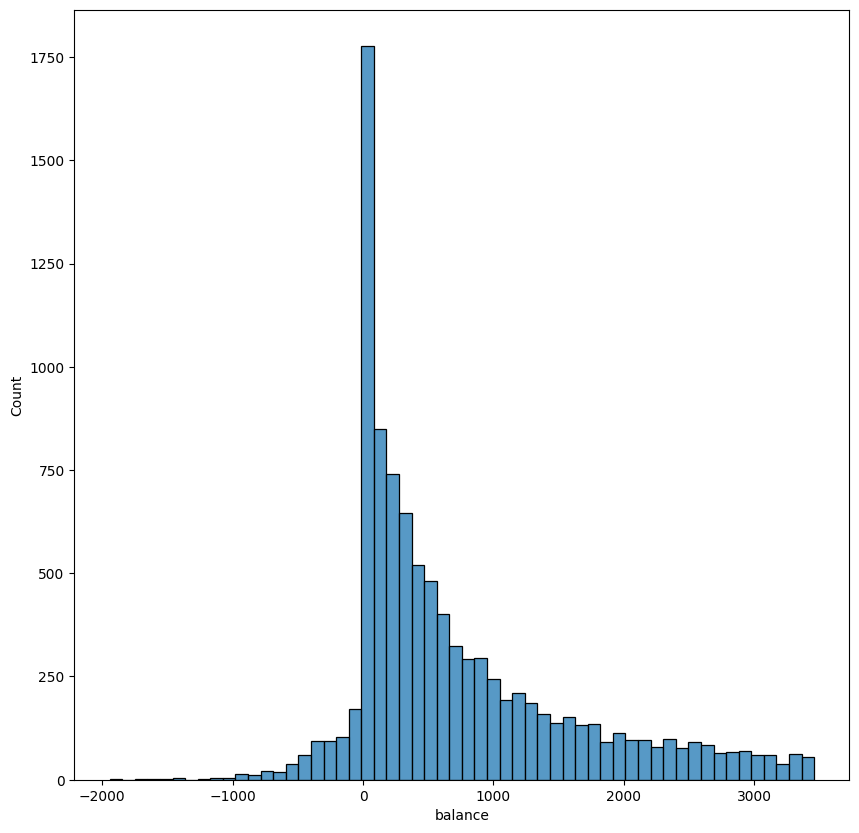

In [22]:
sns.histplot(df["balance"][(df["balance"] >= -1962) & (df["balance"] <= 3462)])
plt.show()

# 모델링(AutoML)

In [69]:
import pandas as pd

# CSV 파일 경로 지정
file_path = '/content/drive/MyDrive/ITStudy/09_MLDL/team_pj/bank.csv'

# CSV 파일 읽기
df_bank = pd.read_csv(file_path)

In [70]:
# 기존 전처리
from sklearn.preprocessing import StandardScaler

# 과학적 표기법을 기본 소수점 형식으로 다시 설정
pd.reset_option('display.float_format')

# 데이터 확인
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [71]:
# 데이터 복제 및 'duration' 컬럼 제거
df_bank_ready = df_bank.copy()
df_bank_ready = df_bank_ready.drop('duration', axis=1)  # 예측에 불필요한 컬럼 제거

# 스케일러 객체 생성
sc = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

# 수치형 변수에 대해 스케일링 적용
df_bank_ready[num_cols] = sc.fit_transform(df_bank_ready[num_cols])

# 결과 확인
print(df_bank_ready.head())

        age         job  marital  education default   balance housing loan  \
0  1.491505      admin.  married  secondary      no  0.252525     yes   no   
1  1.239676      admin.  married  secondary      no -0.459974      no   no   
2 -0.019470  technician  married  secondary      no -0.080160     yes   no   
3  1.155733    services  married  secondary      no  0.293762     yes   no   
4  1.071790      admin.  married   tertiary      no -0.416876      no   no   

   contact       day month  campaign     pdays  previous poutcome deposit  
0  unknown -1.265746   may -0.554168 -0.481184  -0.36326  unknown     yes  
1  unknown -1.265746   may -0.554168 -0.481184  -0.36326  unknown     yes  
2  unknown -1.265746   may -0.554168 -0.481184  -0.36326  unknown     yes  
3  unknown -1.265746   may -0.554168 -0.481184  -0.36326  unknown     yes  
4  unknown -1.265746   may -0.186785 -0.481184  -0.36326  unknown     yes  


In [72]:
# 스케일링 이후 각 컬럼의 평균과 표준편차 확인
print(df_bank_ready[num_cols].mean())
print(df_bank_ready[num_cols].std())


age         2.749995e-16
balance     1.018517e-17
day        -2.037033e-17
campaign    3.055550e-17
pdays       5.092584e-18
previous   -2.037033e-17
dtype: float64
age         1.000045
balance     1.000045
day         1.000045
campaign    1.000045
pdays       1.000045
previous    1.000045
dtype: float64


In [73]:
from sklearn.preprocessing import OneHotEncoder

# OneHot 인코더 생성 및 적용 (sparse 대신 sparse_output 사용)
encoder = OneHotEncoder(sparse_output=False, drop='first')

# 범주형 변수 목록에 'deposit'도 추가
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

# 범주형 변수를 인코딩
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank_ready[cat_cols]))

# 인코딩된 컬럼명 설정
df_encoded.columns = encoder.get_feature_names_out(cat_cols)

# 기존 범주형 변수를 제거하고 인코딩된 변수들과 결합
df_bank_ready = df_bank_ready.drop(cat_cols, axis=1)
df_bank_ready = pd.concat([df_bank_ready.reset_index(drop=True), df_encoded.reset_index(drop=True)], axis=1)

# 결과 확인
print(df_bank_ready.head())


        age   balance       day  campaign     pdays  previous  \
0  1.491505  0.252525 -1.265746 -0.554168 -0.481184  -0.36326   
1  1.239676 -0.459974 -1.265746 -0.554168 -0.481184  -0.36326   
2 -0.019470 -0.080160 -1.265746 -0.554168 -0.481184  -0.36326   
3  1.155733  0.293762 -1.265746 -0.554168 -0.481184  -0.36326   
4  1.071790 -0.416876 -1.265746 -0.186785 -0.481184  -0.36326   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  ...  \
0              0.0               0.0            0.0             0.0  ...   
1              0.0               0.0            0.0             0.0  ...   
2              0.0               0.0            0.0             0.0  ...   
3              0.0               0.0            0.0             0.0  ...   
4              0.0               0.0            0.0             0.0  ...   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
0        0.0        0.0        1.0        0.0        0.0        0.0   
1        0

In [ ]:
# # df_bank_ready에 합쳐줍니다.
# df_bank_ready = df_bank_ready.drop(cat_cols, axis=1)
# df_bank_ready = pd.concat([df_encoded, df_bank_ready], axis=1)
# df_bank_ready.head()

In [ ]:
# # deposit  yes =1 , no = 0으로 수치형 변환이 필요합니다.
# df_bank_ready['deposit'] = df_bank_ready['deposit'].apply(lambda x: 1 if x =='yes' else 0)
# df_bank_ready.head()

In [74]:
from pycaret.classification import *

# 1. PyCaret 환경 설정
s = setup(data=df_bank_ready, target='deposit_yes', session_id=123)

# 2. 다양한 모델 비교 및 최적 모델 선택
best_model = compare_models()

# 3. 최적 모델 출력
print(best_model)

# 4. 최적 모델 평가
evaluate_model(best_model)

# 5. 최적 모델로 예측
predictions = predict_model(best_model)


,Description,Value
0,Session id,123
1,Target,deposit_yes
2,Target type,Binary
3,Original data shape,"(11162, 42)"
4,Transformed data shape,"(11162, 42)"
5,Transformed train set shape,"(7813, 42)"
6,Transformed test set shape,"(3349, 42)"
7,Numeric features,41
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7326,0.7906,0.6148,0.7745,0.6851,0.4582,0.4676,1.2730
lightgbm,Light Gradient Boosting Machine,0.7255,0.7887,0.6264,0.7529,0.6835,0.4448,0.4509,1.0660
rf,Random Forest Classifier,0.7189,0.7780,0.6399,0.7330,0.6831,0.4327,0.4361,1.1770
xgboost,Extreme Gradient Boosting,0.7179,0.7747,0.6451,0.7288,0.6842,0.4310,0.4338,0.2430
ada,Ada Boost Classifier,0.7113,0.7696,0.5913,0.7464,0.6597,0.4148,0.4234,0.3230
lr,Logistic Regression,0.7019,0.7638,0.5767,0.7371,0.6468,0.3956,0.4047,0.6540
ridge,Ridge Classifier,0.7010,0.7631,0.5732,0.7374,0.6447,0.3936,0.4031,0.0760
lda,Linear Discriminant Analysis,0.7009,0.7630,0.5729,0.7373,0.6445,0.3934,0.4029,0.0700
et,Extra Trees Classifier,0.6964,0.7552,0.6375,0.6966,0.6655,0.3886,0.3901,1.2480
qda,Quadratic Discriminant Analysis,0.6887,0.7522,0.4684,0.7892,0.5877,0.3629,0.3949,0.0600


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7337,0.7855,0.6181,0.7743,0.6875,0.4604,0.4693


In [75]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6893,0.7697,0.5270,0.7414,0.6161,0.3674,0.3825
1,0.7302,0.7721,0.5822,0.7941,0.6719,0.4518,0.4676
2,0.7187,0.7791,0.5795,0.7706,0.6615,0.4290,0.4418
3,0.7311,0.7731,0.6081,0.7759,0.6818,0.4549,0.4650
4,0.7439,0.8018,0.6297,0.7872,0.6997,0.4812,0.4904
5,0.7273,0.7872,0.5919,0.7794,0.6728,0.4464,0.4588
6,0.7093,0.7605,0.5378,0.7804,0.6368,0.4079,0.4276
7,0.7503,0.7933,0.6189,0.8092,0.7014,0.4933,0.5064
8,0.7426,0.7929,0.6297,0.7845,0.6987,0.4787,0.4875


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [76]:
best_model = compare_models(include=['gbc', 'lightgbm', 'rf', 'xgboost'])


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7326,0.7906,0.6148,0.7745,0.6851,0.4582,0.4676,1.2190
lightgbm,Light Gradient Boosting Machine,0.7255,0.7887,0.6264,0.7529,0.6835,0.4448,0.4509,1.1100
rf,Random Forest Classifier,0.7189,0.7780,0.6399,0.7330,0.6831,0.4327,0.4361,0.8990
xgboost,Extreme Gradient Boosting,0.7179,0.7747,0.6451,0.7288,0.6842,0.4310,0.4338,0.3420


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

In [77]:
from pycaret.classification import *

# 1. PyCaret 환경 설정 + 변수 선택 활성화
s = setup(data=df_bank_ready, target='deposit_yes', session_id=123, feature_selection=True)

# 2. 다양한 모델 비교 및 최적 모델 선택
best_model = compare_models()

# 3. 최적 모델 출력
print(best_model)

# 4. 최적 모델 평가
evaluate_model(best_model)

# 5. 최적 모델로 예측
predictions = predict_model(best_model)


[LightGBM] [Info] Number of positive: 3702, number of negative: 4111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 7813, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473826 -> initscore=-0.104793
[LightGBM] [Info] Start training from score -0.104793


,Description,Value
0,Session id,123
1,Target,deposit_yes
2,Target type,Binary
3,Original data shape,"(11162, 42)"
4,Transformed data shape,"(11162, 9)"
5,Transformed train set shape,"(7813, 9)"
6,Transformed test set shape,"(3349, 9)"
7,Numeric features,41
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6734,0.7286,0.5489,0.6973,0.6136,0.3379,0.3455,0.9840
ada,Ada Boost Classifier,0.6729,0.7214,0.5700,0.6862,0.6221,0.3383,0.3431,0.3900
lightgbm,Light Gradient Boosting Machine,0.6721,0.7259,0.5567,0.6912,0.6165,0.3359,0.3421,0.5760
xgboost,Extreme Gradient Boosting,0.6569,0.7078,0.5675,0.6606,0.6102,0.3069,0.3100,0.2680
rf,Random Forest Classifier,0.6492,0.7008,0.5816,0.6438,0.6110,0.2930,0.2944,1.6750
nb,Naive Bayes,0.6438,0.6776,0.5313,0.6544,0.5817,0.2787,0.2869,0.2630
qda,Quadratic Discriminant Analysis,0.6437,0.6790,0.5208,0.6586,0.5764,0.2777,0.2871,0.1650
et,Extra Trees Classifier,0.6386,0.6831,0.5837,0.6275,0.6046,0.2726,0.2733,1.1040
lr,Logistic Regression,0.6368,0.6791,0.5843,0.6239,0.6020,0.2690,0.2703,0.1770
lda,Linear Discriminant Analysis,0.6342,0.6769,0.5821,0.6209,0.5990,0.2638,0.2653,0.1700


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6913,0.7401,0.5696,0.7203,0.6362,0.3743,0.3821


### 변수 선택

In [78]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 타겟과 피처 분리
X = df_bank_ready.drop('deposit_yes', axis=1)
y = df_bank_ready['deposit_yes']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 전진 선택법 구현
def forward_selection(X, y):
    initial_features = []
    best_features = []

    while len(initial_features) < X.shape[1]:
        remaining_features = [f for f in X.columns if f not in initial_features]
        scores = {}
        for f in remaining_features:
            model = sm.Logit(y, sm.add_constant(X[initial_features + [f]])).fit(disp=0)
            scores[f] = model.aic  # AIC 기준 사용
        best_feature = min(scores, key=scores.get)
        initial_features.append(best_feature)
        best_features.append(best_feature)

    return best_features

# 전진 선택법으로 선택된 피처들
best_features = forward_selection(X_train, y_train)
print("선택된 피처:", best_features)


선택된 피처: ['poutcome_success', 'contact_unknown', 'month_mar', 'housing_yes', 'campaign', 'month_oct', 'month_sep', 'marital_married', 'month_jun', 'month_dec', 'loan_yes', 'balance', 'job_retired', 'month_aug', 'month_nov', 'month_jan', 'month_jul', 'month_may', 'month_feb', 'education_tertiary', 'job_student', 'contact_telephone', 'poutcome_other', 'job_unemployed', 'marital_single', 'education_secondary', 'job_management', 'job_housemaid', 'job_entrepreneur', 'default_yes', 'previous', 'job_services', 'job_unknown', 'job_technician', 'job_self-employed', 'education_unknown', 'poutcome_unknown', 'day', 'job_blue-collar', 'age', 'pdays']


In [79]:
def backward_elimination(X, y):
    features = X.columns.tolist()

    while len(features) > 0:
        model = sm.Logit(y, sm.add_constant(X[features])).fit(disp=0)
        p_values = model.pvalues[1:]  # 첫 번째 상수(constant)는 제외
        worst_feature = p_values.idxmax()  # 가장 큰 p-value 가진 변수
        if p_values[worst_feature] > 0.05:  # p-value가 0.05보다 크면 제거
            features.remove(worst_feature)
        else:
            break

    return features

# 후진 제거법으로 선택된 피처들
best_features_backward = backward_elimination(X_train, y_train)
print("선택된 피처:", best_features_backward)


선택된 피처: ['balance', 'campaign', 'job_retired', 'job_student', 'marital_married', 'education_tertiary', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success']


In [87]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

# 모델 설정
model1 = GradientBoostingClassifier()

# RFE 사용
rfe1 = RFE(model1, n_features_to_select=10)  # 선택할 피처 수
rfe1 = rfe1.fit(X_train, y_train)

# 선택된 피처 확인
print("Selected features:", X_train.columns[rfe1.support_])


Selected features: Index(['age', 'balance', 'day', 'campaign', 'pdays', 'housing_yes',
       'contact_unknown', 'month_mar', 'month_oct', 'poutcome_success'],
      dtype='object')


In [91]:
# 1. 선택된 피처
selected_features1 = ['age', 'balance', 'day', 'campaign', 'pdays', 'housing_yes', 'contact_unknown', 'month_mar', 'month_oct', 'poutcome_success']

# 2. 선택된 피처로 새로운 X 데이터 구성
X_selected = df_bank_ready[selected_features1]  # 선택된 피처만 포함하는 X 데이터
y = df_bank_ready['deposit_yes']  # 타겟 변수

# 3. 학습/테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=123)

# 4. 모델 학습 (예시로 Gradient Boosting Classifier 사용)
from sklearn.ensemble import GradientBoostingClassifier
model1 = GradientBoostingClassifier()

# 모델 훈련
model1.fit(X_train, y_train)

# 5. 예측 및 성능 평가
y_pred = model1.predict(X_test)

# 성능 평가 (정확도 출력)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.7020


In [84]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# 모델 설정
model2 = RandomForestClassifier()

# RFE 사용
rfe2 = RFE(model2, n_features_to_select=10)  # 선택할 피처 수
rfe2 = rfe2.fit(X_train, y_train)

# 선택된 피처 확인
print("Selected features:", X_train.columns[rfe2.support_])


Selected features: Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'education_secondary', 'housing_yes', 'contact_unknown',
       'poutcome_success'],
      dtype='object')


In [92]:
# 1. 선택된 피처
selected_features1 = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'education_secondary', 'housing_yes', 'contact_unknown',
       'poutcome_success']

# 2. 선택된 피처로 새로운 X 데이터 구성
X_selected = df_bank_ready[selected_features1]  # 선택된 피처만 포함하는 X 데이터
y = df_bank_ready['deposit_yes']  # 타겟 변수

# 3. 학습/테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=123)

# 4. 모델 학습 (예시로 Gradient Boosting Classifier 사용)
from sklearn.ensemble import GradientBoostingClassifier
model1 = GradientBoostingClassifier()

# 모델 훈련
model1.fit(X_train, y_train)

# 5. 예측 및 성능 평가
y_pred = model1.predict(X_test)

# 성능 평가 (정확도 출력)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.6981


In [85]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# 모델 설정
model2 = RandomForestClassifier()

# RFE 사용
rfe = RFE(model, n_features_to_select=10)  # 선택할 피처 수
rfe = rfe.fit(X_train, y_train)

# 선택된 피처 확인
print("Selected features:", X_train.columns[rfe.support_])


KeyboardInterrupt: 

In [30]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model
# Evaluate Model

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_eval = evaluate_model(rf, X_test, y_test)
rf_eval['auc']

0.7832614728713349

## Auto ML

In [32]:
!pip install pycaret

In [49]:
import pycaret
import pandas as pd
import numpy as np

x = pd.DataFrame(feature, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age', 'balance', 'day', 'campaign', 'pdays', 'previous'])
# x = pd.DataFrame(feature, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age', 'balance', 'day', 'campaign', 'pdays', 'previous'])
y = pd.DataFrame(target, columns=['deposit'])

bostonDF = x
bostonDF['deposit'] = y

In [50]:
bostonDF.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,campaign,pdays,previous,deposit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.49e+00,2.53e-01,-1.27e+00,-5.54e-01,-4.81e-01,-3.63e-01,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24e+00,-4.60e-01,-1.27e+00,-5.54e-01,-4.81e-01,-3.63e-01,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.95e-02,-8.02e-02,-1.27e+00,-5.54e-01,-4.81e-01,-3.63e-01,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.16e+00,2.94e-01,-1.27e+00,-5.54e-01,-4.81e-01,-3.63e-01,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.07e+00,-4.17e-01,-1.27e+00,-1.87e-01,-4.81e-01,-3.63e-01,1


In [51]:
pycaret.__version__

from pycaret.classification import *

s = setup(bostonDF, target ='deposit', session_id = 123)

,Description,Value
0,Session id,123
1,Target,deposit
2,Target type,Binary
3,Original data shape,"(11162, 16)"
4,Transformed data shape,"(11162, 7)"
5,Transformed train set shape,"(7813, 7)"
6,Transformed test set shape,"(3349, 7)"
7,Numeric features,15
8,Rows with missing values,100.0%
9,Preprocess,True


In [44]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6599,0.7038,0.5130,0.6905,0.5881,0.3092,0.3194,0.3670
lightgbm,Light Gradient Boosting Machine,0.6574,0.7119,0.5303,0.6771,0.5944,0.3054,0.3124,0.7990
gbc,Gradient Boosting Classifier,0.6571,0.7098,0.5103,0.6855,0.5847,0.3034,0.3131,0.6550
xgboost,Extreme Gradient Boosting,0.6471,0.6926,0.5443,0.6528,0.5934,0.2864,0.2901,0.2270
rf,Random Forest Classifier,0.6362,0.6876,0.5638,0.6298,0.5949,0.2667,0.2681,0.8790
et,Extra Trees Classifier,0.6315,0.6675,0.5916,0.6158,0.6033,0.2596,0.2598,0.8590
nb,Naive Bayes,0.6250,0.6564,0.4219,0.6638,0.5158,0.2340,0.2500,0.0500
qda,Quadratic Discriminant Analysis,0.6181,0.6568,0.3909,0.6647,0.4922,0.2180,0.2377,0.0330
lr,Logistic Regression,0.6176,0.6449,0.4227,0.6472,0.5113,0.2195,0.2329,0.0480
ridge,Ridge Classifier,0.6163,0.6431,0.4079,0.6514,0.5016,0.2158,0.2314,0.0550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [45]:
reg = create_model('et')
print(reg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6151,0.6500,0.5784,0.5961,0.5871,0.2268,0.2269
1,0.6445,0.6785,0.6173,0.6274,0.6223,0.2866,0.2866
2,0.6036,0.6495,0.5606,0.5859,0.5730,0.2034,0.2036
3,0.6274,0.6673,0.6108,0.6059,0.6083,0.2530,0.2531
4,0.6735,0.7068,0.6297,0.6638,0.6463,0.3435,0.3439
5,0.6159,0.6362,0.5676,0.6000,0.5833,0.2275,0.2279
6,0.6364,0.6618,0.5730,0.6272,0.5989,0.2676,0.2685
7,0.6210,0.6627,0.5730,0.6057,0.5889,0.2378,0.2382
8,0.6453,0.6932,0.6216,0.6267,0.6242,0.2884,0.2884


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [46]:
plot_model(reg, plot = 'residuals')
plot_model(reg, plot = 'error')
plot_model(reg, plot = 'feature')

ValueError: Plot Not Available. Please see docstring for list of available Plots.

# 파라미터 조정

## Correlation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame creation
# Replace this with the actual data loading step
# df = pd.read_csv('bank_dataset.csv')

# Generating a random dataframe with 13 features for the purpose of demonstration
np.random.seed(42)
df = pd.DataFrame(np.random.rand(100, 13), columns=[f'Feature_{i+1}' for i in range(13)])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

correlation_matrix

In [40]:
# 하이퍼파라미터 튜닝
tuned_model = tune_model(reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4786,0.2327,0.4824,0.0690,0.3373,0.5071
1,0.4796,0.2336,0.4833,0.0571,0.3430,0.5070
2,0.4779,0.2332,0.4829,0.0621,0.3412,0.5063
3,0.4834,0.2373,0.4871,0.0510,0.3392,0.5159
4,0.4786,0.2328,0.4825,0.0674,0.3391,0.5043
5,0.4782,0.2318,0.4814,0.0530,0.3447,0.5057
6,0.4810,0.2354,0.4852,0.0564,0.3409,0.5119
7,0.4804,0.2342,0.4839,0.0542,0.3439,0.5048
8,0.4807,0.2343,0.4841,0.0627,0.3372,0.5118


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


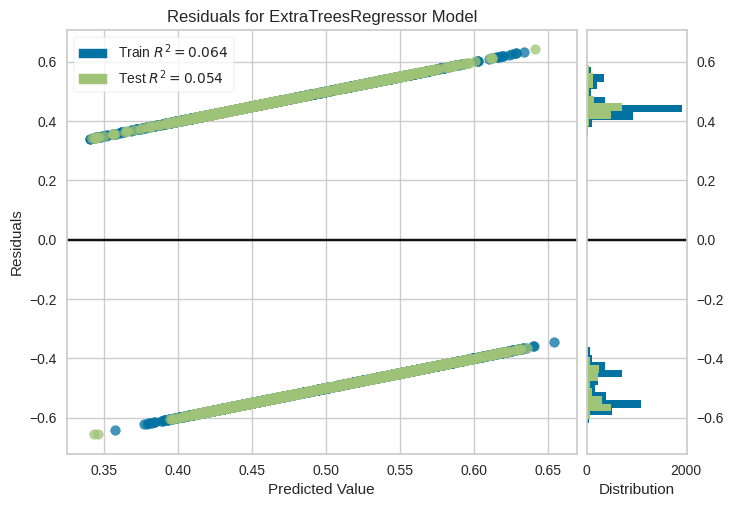

None


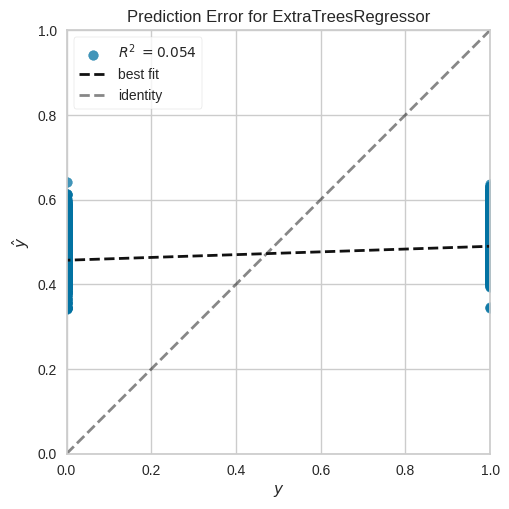

None


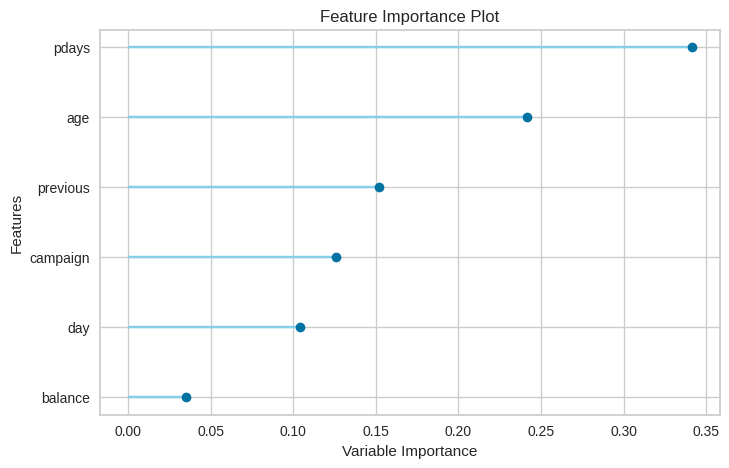

None


In [41]:
print(plot_model(tuned_model, plot = 'residuals'))
print(plot_model(tuned_model, plot = 'error'))
print(plot_model(tuned_model, plot = 'feature'))

In [42]:
# 모델 속성 확인   tuned_model.n_features_in_
print("n_features_in_:", getattr(tuned_model, 'n_features_in_', 'Not available'))
print("n_estimators:", getattr(tuned_model, 'n_estimators', 'Not available'))
print("max_depth:", getattr(tuned_model, 'max_depth', 'Not available'))
print("min_samples_split:", getattr(tuned_model, 'min_samples_split', 'Not available'))
print("min_samples_leaf:", getattr(tuned_model, 'min_samples_leaf', 'Not available'))
print("max_features:", getattr(tuned_model, 'max_features', 'Not available'))
print("bootstrap:", getattr(tuned_model, 'bootstrap', 'Not available'))
print("criterion:", getattr(tuned_model, 'criterion', 'Not available'))

n_features_in_: 6
n_estimators: 240
max_depth: 8
min_samples_split: 5
min_samples_leaf: 2
max_features: sqrt
bootstrap: False
criterion: squared_error
